<a href="https://colab.research.google.com/github/Jannanee14/SE_Assignment8/blob/Titanic_Dataset/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows
print(train.head())


Saving test.csv to test.csv
Saving train.csv to train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [2]:
print(train.info())        # Check data types and missing values
print(train.describe())    # Summary statistics
print(train.isnull().sum())  # Missing value count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

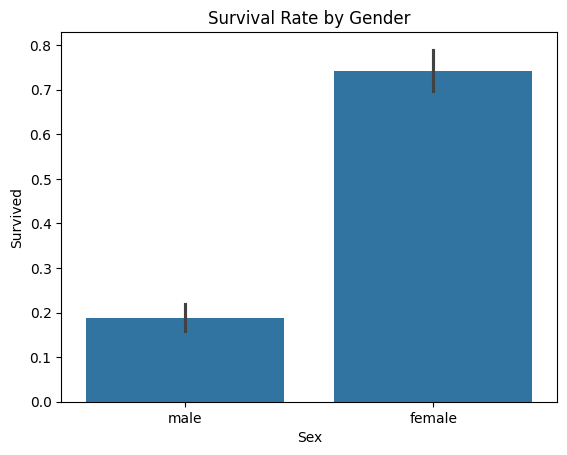

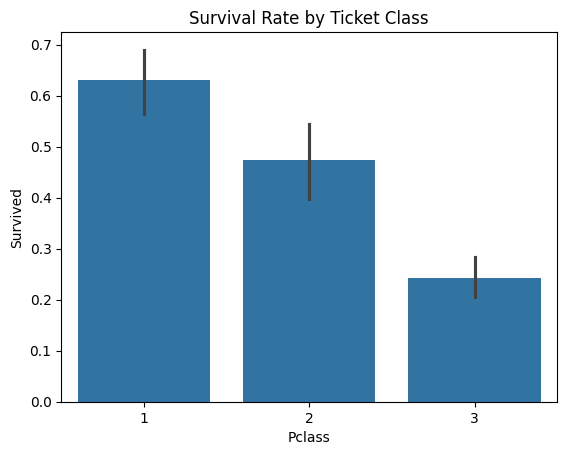

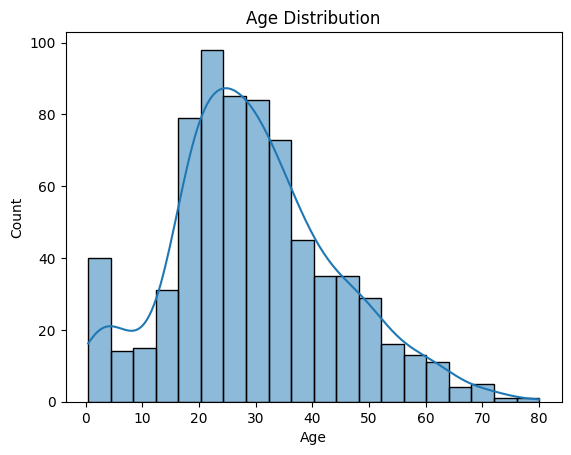

In [6]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Pclass (ticket class)
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Ticket Class')
plt.show()

# Check Age distribution
sns.histplot(train['Age'], kde=True)
plt.title('Age Distribution')
plt.show()



In [7]:
# Fill missing 'Age' with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' in test set with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

<ipython-input-7-d8af16d92610>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-7-d8af16d92610>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [8]:
# Create a new feature: FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Encode categorical variables: 'Sex' and 'Embarked'
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)


In [9]:
# Drop columns not useful for prediction
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [10]:
X = train.drop('Survived', axis=1)  # Features
y = train['Survived']              # Target

# Test features
X_test = test


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Check accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.81


In [13]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')


Cross-Validation Accuracy: 0.81


In [14]:
test_predictions = model.predict(X_test)


In [15]:
# Load test PassengerId
test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created!")


Submission file created!


In [16]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>